# Ice Videogames Store


## Cargar librerías y abrir archivo

In [1]:
# Cargar todas las librerías
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from scipy import stats as st

In [2]:
# Cargar los archivos de datos 
games=pd.read_csv("games.csv")

## Preparación de datos 

In [3]:
# Reemplazo del nombre de las columnas a minúsculas 
games.columns = games.columns.str.lower()
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
# Información general sobre el DataFrame Games
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Podemos ver que existen bastantes valores ausentes en las columnas 'critic_score' , 'user_score' y  'rating', esto es debido a que los juegos antiguos aún no contaban con dicha calificación y tampoco los juegos más recientes porque toma un tiempo para los usuarios y los críticos llegar a una conclusión sobre eso. 

In [5]:
#Ver tipo de datos por columnas
print(games.dtypes)

name                object
platform            object
year_of_release    float64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score          object
rating              object
dtype: object


In [6]:
# Conversión de los datos de la columna user_score a tipo float
games.loc[games['user_score'] == 'tbd', 'user_score'] = 0
games['user_score'] = games['user_score'].astype(float)
print(games.dtypes)

name                object
platform            object
year_of_release    float64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score         float64
rating              object
dtype: object


In [7]:
#Reemplazar los valores 0 en la columna user_score por el promedio
print(games['user_score'].mean())
games['user_score'] = games['user_score'].replace([0], 5.4)

5.40034951068504


Reemplazamos los datos 'TBD' de la columna user_score por 0 para poder convertir el tipo de la columna a float, luego reemplezamos los valores de 0 por el promedio de esa misma que es 5.4 hasta antes del cambio, esto nos servirá para poder realizar cálculos posteriores.

In [8]:
#Cálculo de las ventas totales en una columna separada
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


## Análisis de los datos

### Cantidad de juegos lanzados en diferentes años

<AxesSubplot:title={'center':'Cantidad de juegos lanzados por año'}, xlabel='Año de lanzamiento', ylabel='Número de juegos'>

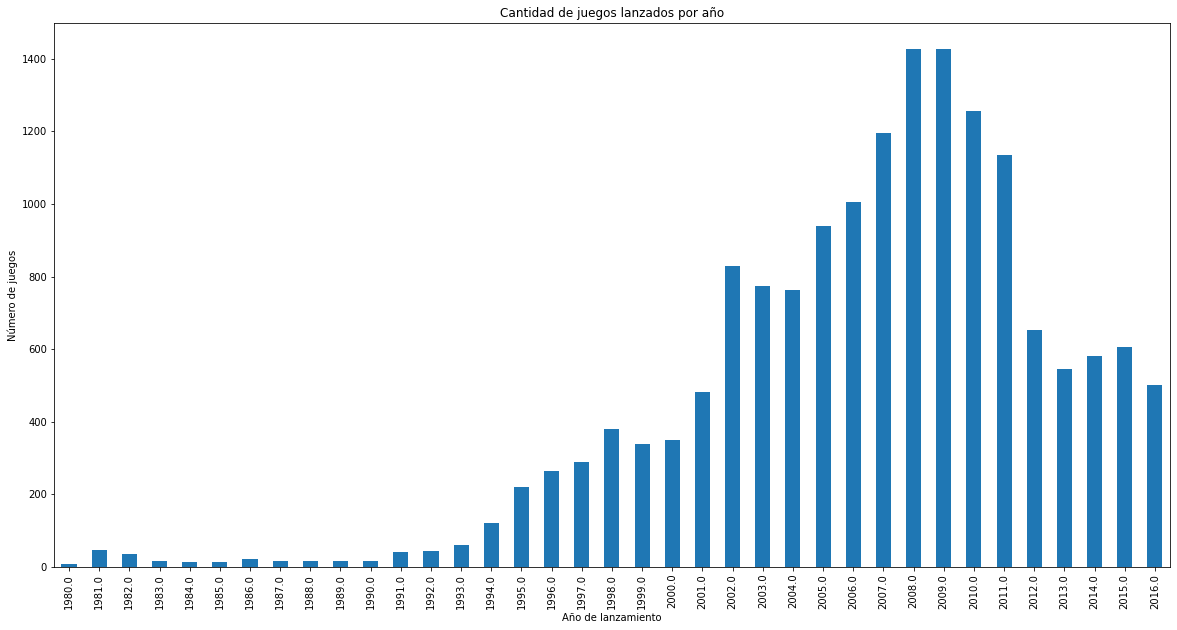

In [9]:
(
games.groupby('year_of_release')['name']
    .count()
    .plot(kind='bar'
          , figsize =(20, 10)
          , title='Cantidad de juegos lanzados por año'
          , ylabel='Número de juegos'
          , xlabel='Año de lanzamiento')
)

De acuerdo a la gráfica podríamos decir que los datos empiezan a ser significativos a partir del año 1995 en la que la producción de juegos se duplica o triplica en comparación a los años anteriores.

### Variación de las ventas de una plataforma a otra

<AxesSubplot:title={'center':'Ventas totales por plataforma'}, xlabel='Nombre de Plataforma', ylabel='Ventas totales expresada en millones de dólares'>

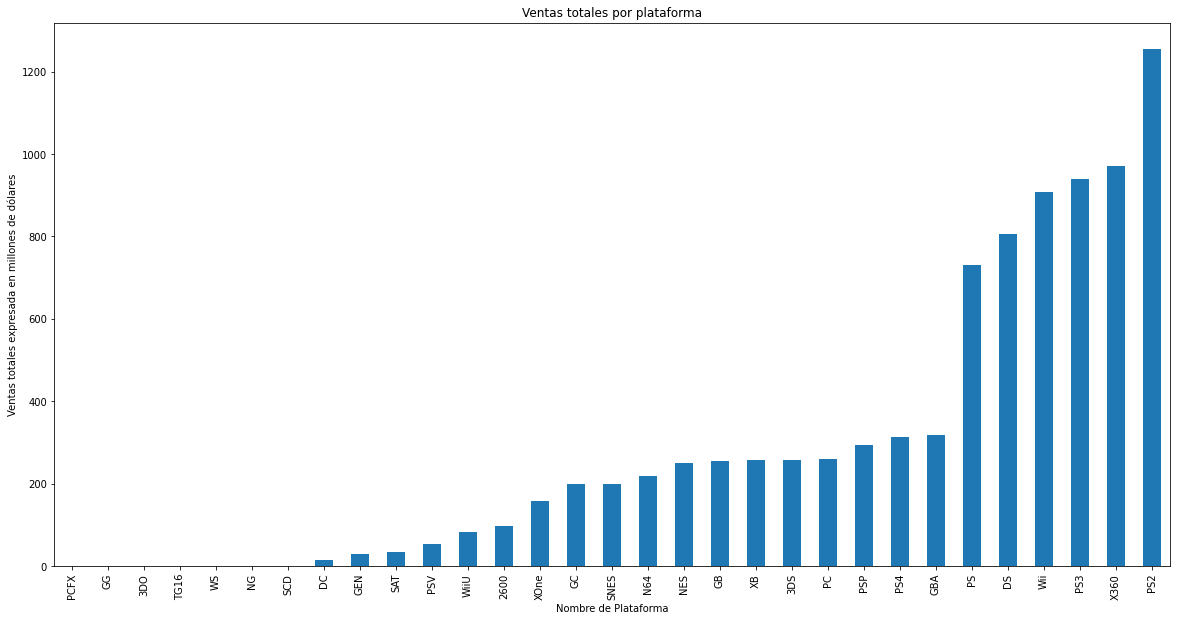

In [10]:
(
    games.groupby('platform')['total_sales']
    .sum()
    .sort_values()
    .plot(kind='bar', figsize =(20, 10), title='Ventas totales por plataforma'
         , xlabel = 'Nombre de Plataforma'
         , ylabel = 'Ventas totales expresada en millones de dólares')
)

Podríamos hacer una lista de 6 plataformas que son las líderes en ventas desde el año 1985, estas son: Play Station, Nintendo DS, Nintendo Wii, Play Station 2 y 3 y el Xbox 360

In [11]:
#Elección de las 10 plataformas más populares
popular_platforms_index = (games.groupby('platform')['total_sales']
                     .sum()
                     .sort_values(ascending = False)
                     .head(10)
                     .index
                        
)
popular_platforms_index
popular_platforms = games[games['platform'].isin(popular_platforms_index)]

<AxesSubplot:title={'center':'Evolución de las ventas a través de los años por plataforma'}, xlabel='Año de lanzamiento', ylabel='Sumatoria de ventas totales'>

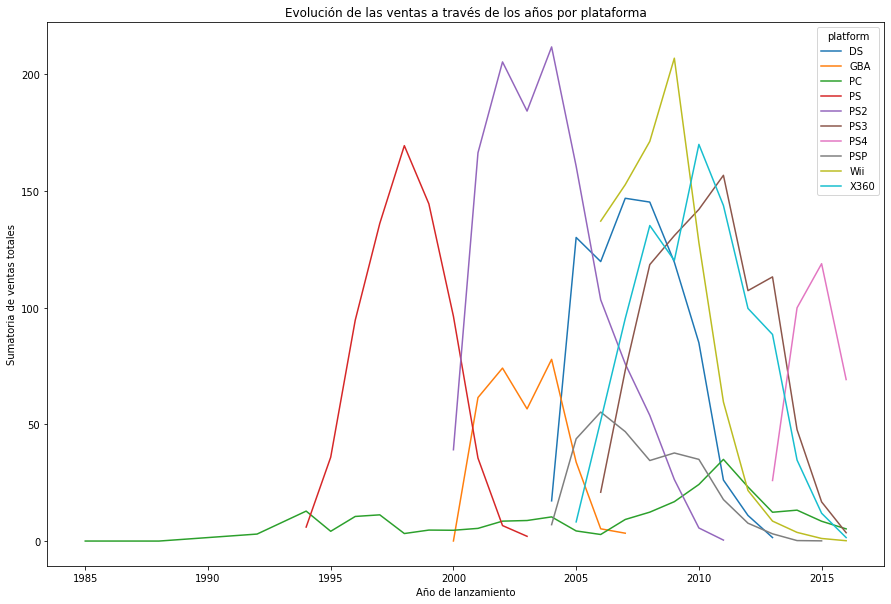

In [12]:
pop_platforms_pivot =  popular_platforms.pivot_table(values='total_sales'
                        , index='year_of_release'
                        , columns=['platform']
                        , aggfunc='sum')
pop_platforms_pivot.plot(kind='line'
                         , figsize=(15,10)
                         , title='Evolución de las ventas a través de los años por plataforma'
                         , xlabel = 'Año de lanzamiento'
                         , ylabel ='Sumatoria de ventas totales')


De acuerdo con el gráfico se puede observar que aproximadamente una plataforma tarde unos 6 a 7 años en desaparecer hasta que aparezca la otra, pero con el paso de los años este tiempo se ve acortado.
Se aprecia también que todas las platformas están en el momento en el que sus ventas han bajado, casi a 0 para el año 2016, la única que se mantiene aún a flote es el Play Station 4, esto debido a qué es la consola con el lanzamiento más reciente.

### Diagrama de Caja

(0.0, 2.0)

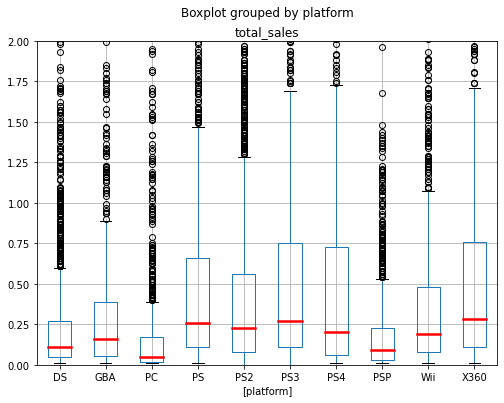

In [13]:
#Creación del diagrama de caja
(
popular_platforms
    .loc[:, ['platform', 'total_sales']]
    .boxplot(by='platform', figsize=(8,6), medianprops = dict(color = "red", linewidth = 2.5)
            ) 
)
plt.ylim(0,2)

Podemos observar que si las ventas tienen una diferencia significativa, hay un top 4 que su vez la diferencia entre las ventas promedio es mínima, estas son: Play Station, Play Staion 2, 3 y el Xbox 360

### Diagrama de dispersión

In [14]:
# Creación del nuevo dataframe con las 5 consolas mas populares
popular_platforms_index1 = (games.groupby('platform')['total_sales']
                     .sum()
                     .sort_values(ascending = False)
                     .head(5)
                     .index
                        
)
popular_platforms1 = games[games['platform'].isin(popular_platforms_index1)]

Para poder realizar el siguiente ejercicio escogí la plataforma más vendida que es el PS2

<AxesSubplot:title={'center':'PS2 Ventas totales - Puntuación de los usuarios'}, xlabel='user_score', ylabel='total_sales'>

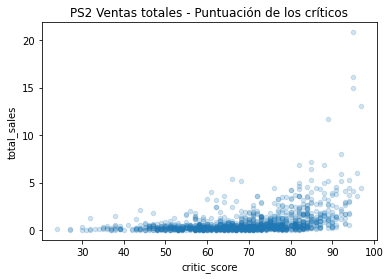

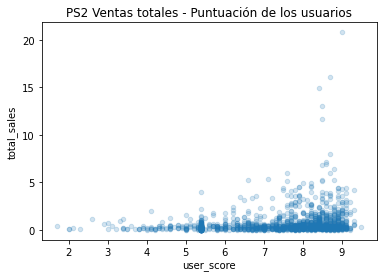

In [29]:
#Filtro de datos del nuevo dataframe
popular_platforms1 = popular_platforms1.loc[:,['platform','critic_score', 'total_sales', 'user_score']]
PS2 = popular_platforms1[popular_platforms1['platform']=='PS2']

#Creación del primer diagrama de dispersión 
PS2.plot(kind='scatter'
         , x='critic_score'
         , y = 'total_sales'
         , alpha=0.2
         , title='PS2 Ventas totales - Puntuación de los críticos')

#Creación del segundo diagrama de dispersión
PS2.plot(kind='scatter'
         , x='user_score'
         , y = 'total_sales'
         , alpha=0.2
         , title='PS2 Ventas totales - Puntuación de los usuarios')


Los gráficos de dispersión nos hacen notar que si bien es cierto existe una correlación entre la puntuación de los usuarios o críticos y las ventas totales, esta no es tan fuerte.

### Comparación de las ventas de los mismos juegos en diferentes plataformas

Para poder realizar la siguiente comparación escogí tres de las plataformas más populares y con mayor cantidad de ventas totales

In [32]:
#Creación de la nueva tabla con solo los datos de estas tres plataformas
index1 = ['PS3', 'X360', 'Wii']
popular_platforms2 = games[games['platform'].isin(index1)]

#Tabla pivote que contiene juegos que se hicieron para estas tres plataformas diferentes
multiple_platform_games = popular_platforms2.pivot_table(values='total_sales'
                         , index='name'
                         , columns=['platform']
                         ).dropna()
multiple_platform_games

platform,PS3,Wii,X360
name,,,
007: Quantum of Solace,1.15,0.65,1.48
2010 FIFA World Cup South Africa,1.23,0.43,0.85
AC/DC LIVE: Rock Band Track Pack,0.24,0.26,0.23
Angry Birds Star Wars,0.29,0.26,0.28
Ashes Cricket 2009,0.16,0.23,0.20
...,...,...,...
You Don't Know Jack,0.17,0.20,0.20
Young Justice: Legacy,0.09,0.03,0.01
Zumba Fitness,0.57,6.70,2.37


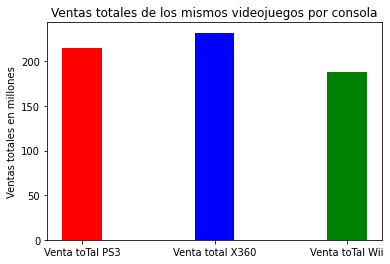

In [33]:
#Suma de las ventas totales de los mismos juegos en diferentes plataformas
totalps3 = multiple_platform_games["PS3"].sum()
totalx360 = multiple_platform_games["X360"].sum()
totalwii = multiple_platform_games["Wii"].sum()

#Creación del gráfico de barras 
list1 = [totalps3, totalx360, totalwii]
fig, ax = plt.subplots()
ax.bar(['Venta toTal PS3', 'Venta total X360', 'Venta toTal Wii'],list1, width = 0.3, color =['red', 'blue', 'green'])
ax.set_title('Ventas totales de los mismos videojuegos por consola')
ax.set_ylabel('Ventas totales en millones')
plt.show()

En términos totales el Xbox 360 tiene mayores ventas que las otras dos plataformas en los mismos juegos

### Distribución general de los juegos por género

(0.0, 2.0)

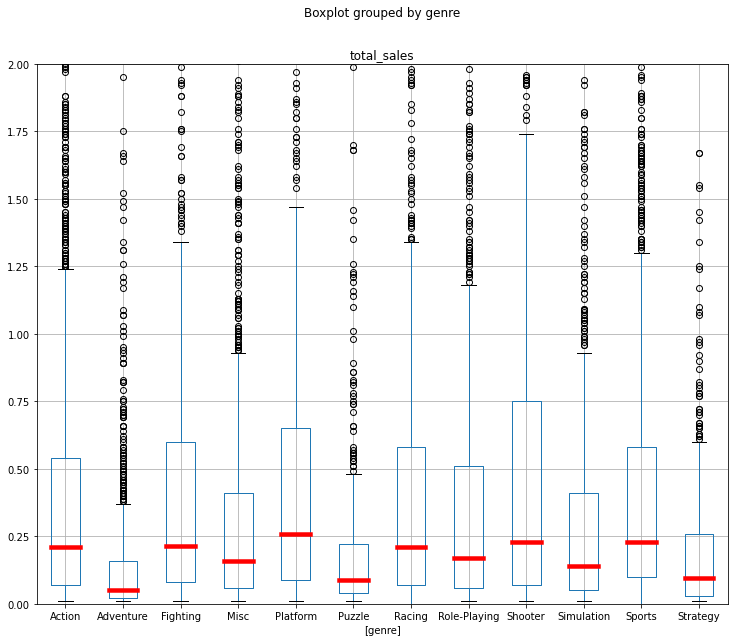

In [17]:
#Creación del diagrama de caja para la distribución general de los juegos por género
(
popular_platforms
    .loc[:, ['genre', 'total_sales']]
    .boxplot(by='genre', figsize=(12,10), medianprops = dict(color = "red", linewidth = 4.5)) 
)
plt.ylim(0,2)

Los géneros con mas ventas en promedio son los juegos plataforma, shooter y de deportes

## Perfil de usuario para cada región

### Las 5 plataformas principales por región

In [18]:
# Región de norteamérica
region = 'na'
region_sales = f'{region}_sales'
# Las 5 plataformas más populares de la región
popular_platforms3 = games.groupby('platform')[region_sales].sum().sort_values(ascending=False).head(5).index
print(f'Cuota de mercado por plataforma en la region de {region}')
games[games['platform'].isin(popular_platforms3)].groupby('platform')[region_sales].sum()/games[region_sales].sum()

Cuota de mercado por plataforma en la region de na


platform
DS      0.086863
PS2     0.132620
PS3     0.089382
Wii     0.112872
X360    0.136852
Name: na_sales, dtype: float64

In [19]:
# Región de europa
region = 'eu'
region_sales = f'{region}_sales'
# Las 5 plataformas más populares de la región
popular_platforms3 = games.groupby('platform')[region_sales].sum().sort_values(ascending=False).head(5).index
print(f'Cuota de mercado por plataforma en la region de {region}')
games[games['platform'].isin(popular_platforms3)].groupby('platform')[region_sales].sum()/games[region_sales].sum()

Cuota de mercado por plataforma en la region de eu


platform
PS      0.088099
PS2     0.139932
PS3     0.136221
Wii     0.108143
X360    0.111669
Name: eu_sales, dtype: float64

In [20]:
# Ventas en Japón
region = 'jp'
region_sales = f'{region}_sales'
# Las 5 plataformas más populares de la región
popular_platforms3 = games.groupby('platform')[region_sales].sum().sort_values(ascending=False).head(5).index
print(f'Cuota de mercado por plataforma en la region de {region}')
games[games['platform'].isin(popular_platforms3)].groupby('platform')[region_sales].sum()/games[region_sales].sum()

Cuota de mercado por plataforma en la region de jp


platform
3DS     0.077595
DS      0.135328
PS      0.107772
PS2     0.107294
SNES    0.089836
Name: jp_sales, dtype: float64

La diferencia más notoria es la presencia de la marca Nintendo en el top de ventas de juegos hechos para dichas consolas en la región de Japón, a su vez es la región con mayor preferencia por las consolas portátiles. En cuánto a Europa y Norteamérica las principales consolas casi no varían

### Los 5 géneros principales por región

In [38]:
# Región de norteamérica
region = 'na'
region_sales = f'{region}_sales'
groupby_col = 'genre'
# Los 5 géneros más populares de la región
genre_share = games.groupby(groupby_col)[region_sales].sum().sort_values(ascending = False).head(5).index
print(f'Cuota de mercado por género en la región de {region}')
games[games[groupby_col].isin(genre_share)].groupby(groupby_col)[region_sales].sum()/games[region_sales].sum()

Cuota de mercado por género en la región de na


genre
Action      0.199668
Misc        0.092512
Platform    0.101196
Shooter     0.134528
Sports      0.155469
Name: na_sales, dtype: float64

In [39]:
# Región de Europa
region = 'eu'
region_sales = f'{region}_sales'
groupby_col = 'genre'
# Los 5 géneros más populares de la región
genre_share = games.groupby(groupby_col)[region_sales].sum().sort_values(ascending = False).head(5).index
print(f'Cuota de mercado por género en la región de {region}')
games[games[groupby_col].isin(genre_share)].groupby(groupby_col)[region_sales].sum()/games[region_sales].sum()

Cuota de mercado por género en la región de eu


genre
Action     0.214103
Misc       0.087740
Racing     0.097543
Shooter    0.130880
Sports     0.155398
Name: eu_sales, dtype: float64

In [41]:
# Japón
region = 'jp'
region_sales = f'{region}_sales'
groupby_col = 'genre'
# Los 5 géneros más populares de la región
genre_share = games.groupby(groupby_col)[region_sales].sum().sort_values(ascending = False).head(5).index
print(f'Cuota de mercado por género en la región de {region}')
games[games[groupby_col].isin(genre_share)].groupby(groupby_col)[region_sales].sum()/games[region_sales].sum()

Cuota de mercado por género en la región de jp


genre
Action          0.124429
Misc            0.083330
Platform        0.100842
Role-Playing    0.273947
Sports          0.104473
Name: jp_sales, dtype: float64

Esta vez en cuanto a los géneros casi no podemos ver variación entre la región de Europa y Norteamérica, nuevamente Japón se sale del molde con los juegos de Role-Playing ocupando un 28% de la cuota de mercado.

### Calificaciones y su efecto en las regiones

In [24]:
# Región de norteamérica
region = 'na'
region_sales = f'{region}_sales'
groupby_col = 'rating'
rating_share = games.groupby(groupby_col)[region_sales].sum().sort_values(ascending = False).index
print(f'Cuota de mercado por rating en la región de {region}')
games[games[groupby_col].isin(rating_share)].groupby(groupby_col, dropna=False)[region_sales].sum()/games[region_sales].sum()

Cuota de mercado por rating en la región de na


rating
AO      0.000286
E       0.293704
E10+    0.080257
EC      0.000348
K-A     0.000582
M       0.170018
RP      0.000000
T       0.172578
Name: na_sales, dtype: float64

Los juegos de clasificación "Para todo público en Norteamérica" se llevan la mayor cuota de mercado con 29%, mientras que los juegos para adolescentes y adultos tienen ambos un 17%

In [25]:
# Región de Europa
region = 'eu'
region_sales = f'{region}_sales'
groupby_col = 'rating'
rating_share = games.groupby(groupby_col)[region_sales].sum().sort_values(ascending = False).index
print(f'Cuota de mercado por rating en la región de {region}')
games[games[groupby_col].isin(rating_share)].groupby(groupby_col, dropna=False)[region_sales].sum()/games[region_sales].sum()

Cuota de mercado por rating en la región de eu


rating
AO      0.000252
E       0.292926
E10+    0.077751
EC      0.000045
K-A     0.000111
M       0.199602
RP      0.000033
T       0.176119
Name: eu_sales, dtype: float64

Los juegos de clasificación "Para todo público en Europa" se llevan la mayor cuota de mercado con 29%, mientras que los juegos para adolescentes y adultos tienen un 17% y 19% respectivamente

In [26]:
# Japón
region = 'jp'
region_sales = f'{region}_sales'
groupby_col = 'rating'
rating_share = games.groupby(groupby_col)[region_sales].sum().sort_values(ascending = False).index
print(f'Cuota de mercado por rating en la región de {region}')
games[games[groupby_col].isin(rating_share)].groupby(groupby_col, dropna=False)[region_sales].sum()/games[region_sales].sum()

Cuota de mercado por rating en la región de jp


rating
AO      0.000000
E       0.152701
E10+    0.030986
EC      0.000000
K-A     0.001125
M       0.049516
RP      0.000000
T       0.116698
Name: jp_sales, dtype: float64

En Japón los juegos de clasificación "Para todo público" se llevan la mayor cuota de mercado con 15%

## Pruebas de hipótesis

### Prueba de hipótesis 1

Hipótesis nula: Las calificaciones promedio de los juegos Xbox One y PC son iguales. 
Hipótesis alternativa: Las calificaciones promedio de los juegos Xbox One y PC son diferentes.

Valor de significancia: 0.05

In [27]:
# Prueba las hipótesis
xone = games.query("platform=='XOne'")['user_score'].dropna()
pc = games.query("platform=='PC'")['user_score'].dropna()

alpha = 0.05 # nivel de significancia 
results = st.ttest_ind(xone, pc, equal_var=False)

print('valor p: ', results.pvalue) # extraer el valor p

if results.pvalue < alpha: # comparar el valor p con el umbral
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")


valor p:  9.007470460388124e-06
Rechazamos la hipótesis nula


### Prueba de hipótesis 2

Hipótesis nula: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son iguales.
Hipótesis alternativa: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

Valor de significancia: 0.05

In [37]:
# Prueba las hipótesis
accion = games.query("genre=='Action'")['user_score'].dropna()
deportes = games.query("genre=='Sports'")['user_score'].dropna()

alpha = 0.05 # nivel de significancia 
results = st.ttest_ind(accion, deportes, equal_var=False)

print('valor p: ', results.pvalue) # extraer el valor p

if results.pvalue < alpha: # comparar el valor p con el umbral
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")


valor p:  2.4521218580579304e-06
Rechazamos la hipótesis nula


## Conclusiones generales

Una vez analizados todos los datos, podemos encontrar un patrón.

Para poder maximizar las probabilidades de producir un videojuego rentable, tendría que estar hecho ya sea para Play Station o Xbox, tener cómo género "Acción" y ser apto para todo público.